In [106]:
# Чтобы скачать и распаковать zip-архив в output папку в Питоне:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
#!/usr/bin/env python
import io
import zipfile
import requests  # $ pip install requests

pd.set_option('display.max_columns', 40) # выводить больше столбцов
pd.set_option('display.max_rows', 40)   # выводить больше строк
plt.style.use('default')    # корректный вывод графиков в темной теме 


r = requests.get("https://lms.skillfactory.ru/assets/courseware/v1/e8e401d5f46b6c4e81f7330cc24d4fe2/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/covid_data.zip")
with r, zipfile.ZipFile(io.BytesIO(r.content)) as archive:
    archive.extractall('Data')




# https://lms.skillfactory.ru/assets/courseware/v1/e8e401d5f46b6c4e81f7330cc24d4fe2/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/covid_data.zip

OSError: [Errno 22] Invalid argument: 'Data\\covid_data.csv'

In [80]:
covid_data = pd.read_csv('Data/covid_data.csv', sep=',')

covid_data['confirmed'] = covid_data['confirmed'].astype('int')
covid_data['deaths'] = covid_data['deaths'].astype('int')
covid_data['recovered'] = covid_data['recovered'].astype('int')
display(covid_data.head())

covid_data.info()

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1,0,0
1,01/22/2020,Beijing,China,14,0,0
2,01/22/2020,Chongqing,China,6,0,0
3,01/22/2020,Fujian,China,1,0,0
4,01/22/2020,Gansu,China,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            306429 non-null  object
 1   province/state  228329 non-null  object
 2   country         306429 non-null  object
 3   confirmed       306429 non-null  int32 
 4   deaths          306429 non-null  int32 
 5   recovered       306429 non-null  int32 
dtypes: int32(3), object(3)
memory usage: 10.5+ MB


In [81]:
import pandas as pd
import numpy as np
from IPython.display import display
#!/usr/bin/env python
import io
import zipfile
import requests  # $ pip install requests

r = requests.get("https://lms.skillfactory.ru/assets/courseware/v1/4f12d963943a898af014981a4a822088/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/country_vaccinations.zip")
with r, zipfile.ZipFile(io.BytesIO(r.content)) as archive:
    archive.extractall('Data')


# https://lms.skillfactory.ru/assets/courseware/v1/4f12d963943a898af014981a4a822088/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/country_vaccinations.zip

In [82]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

In [83]:
vaccinations_data.head()

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [84]:
# Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:

covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()


# Преобразуем даты в формат datetime с помощью функции pd.to_datetime():

covid_data['date'] = pd.to_datetime(covid_data['date'])

# Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

# Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. 
# После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():

covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

# В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:

vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])



In [85]:
# Задание 3.1
# За какой период представлены данные в таблице covid_data? В качестве ответа введите даты в формате datetime (без указания времени).
# Введите ответ в следующем формате (без пробелов): ГГГГ-ММ-ДД-ГГГГ-ММ-ДД
print(covid_data['date'].dt.date.min(), '-', covid_data['date'].dt.date.max(), sep='')

2020-01-22-2021-05-29


In [86]:
# Задание 3.2
# 1 point possible (graded)
# За какой период представлены данные в таблице vaccinations_data? В качестве ответа введите даты в формате datetime без указания времени.
# Введите ответ через дефис (например, 2020-01-01-2021-01-01).

print(vaccinations_data['date'].dt.date.min(), '-', vaccinations_data['date'].dt.date.max(), sep='')

2020-12-02-2021-09-06


In [87]:
# Задание 3.3
# 1 point possible (graded)
# С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.
# Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. 
# То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. Результат объединения занесите в переменную covid_df.
# Сохраните таблицу covid_df — она понадобится нам в следующем юните.

covid_df= covid_data.merge(vaccinations_data, how='left', on=['date', 'country'], validate='one_to_one')

# Сколько строк и столбцов в таблице covid_df?

covid_df.info()


# Введите ответ в виде двух чисел через дефис (например, 333-33): первое число — количество строк, второе число — количество столбцов.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  int32         
 3   deaths                               86785 non-null  int32         
 4   recovered                            86785 non-null  int32         
 5   active                               86785 non-null  int32         
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

In [88]:
# В получившейся в задании 3.3 таблице covid_df создайте признаки 
# death_rate — общий процент смертей среди зафиксированных случаев (летальность) 
# # recover_rate — общий процент случаев выздоровления. 
# Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.

covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

In [89]:
# Задание 3.4
# Какова максимальная летальность в США (United States) за весь период? Ответ округлите до второго знака после запятой
display(covid_df['country'].value_counts())
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)

Taiwan                 494
Japan                  494
Thailand               494
South Korea            494
United States          494
                      ... 
Channel Islands          1
Cape Verde               1
North Ireland            1
East Timor               1
Republic of Ireland      1
Name: country, Length: 221, dtype: int64

7.19

In [90]:
# Задание 3.5
# Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.

round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)


67.06

Основные параметры метода plot()

x — название признака, который будет отложен по оси абсцисс;
y — название признака, который будет отложен по оси ординат;
figsize — размер графика (кортеж из ширины и высоты в дюймах);
kind —тип визуализации. Основные типы:
'line' — линейный график (по умолчанию);
'bar' — столбчатая диаграмма;
'barh' — горизонтальная столбчатая диаграмма;
'hist' — гистограмма;
'box' — коробчатая диаграмма (boxplot);
'pie' — круговая диаграмма;
'scatter' — диаграмма рассеяния.
grid — отображение сетки (по умолчанию False);
legend — отображение легенды (по умолчанию False);
title — название графика;
color — цвет.

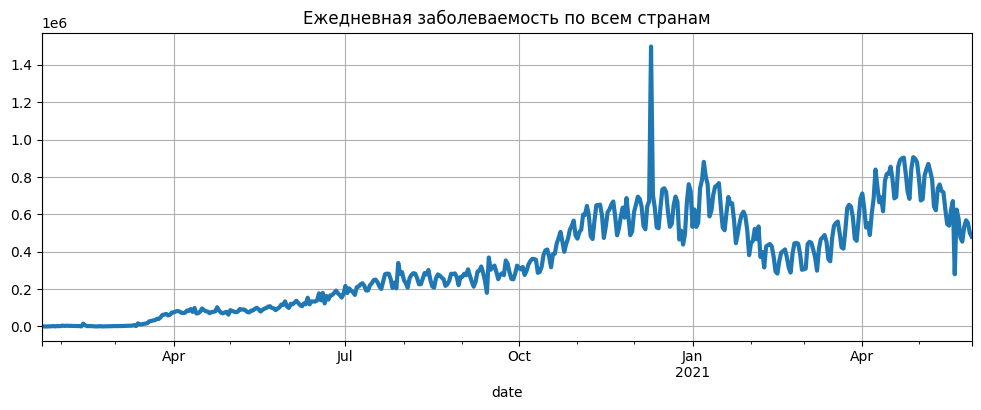

In [91]:
import matplotlib.pyplot as plt

grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость по всем странам',
    grid = True,
    lw=3
);

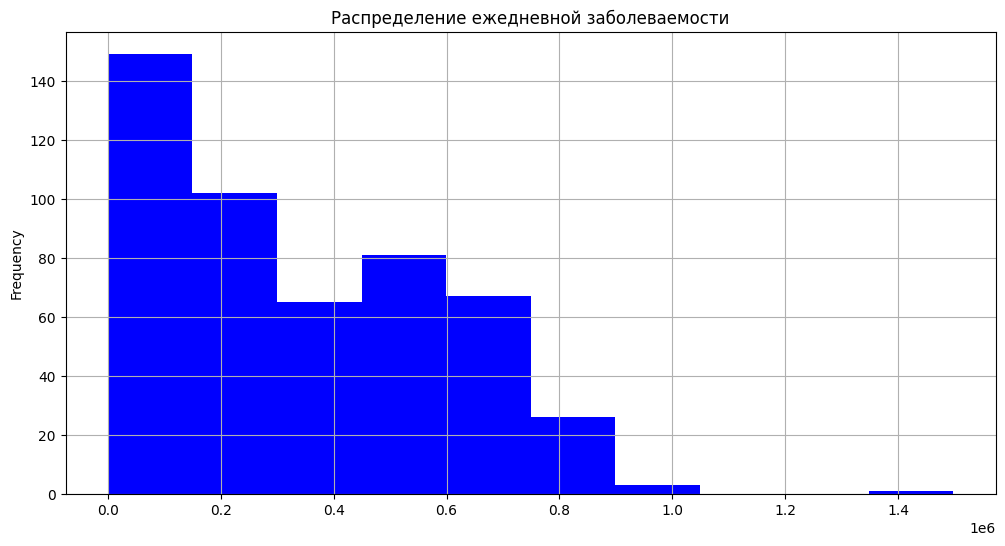

In [92]:
grouped_cases.plot(
    kind='hist',
    figsize=(12, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'blue',
    bins=10
);

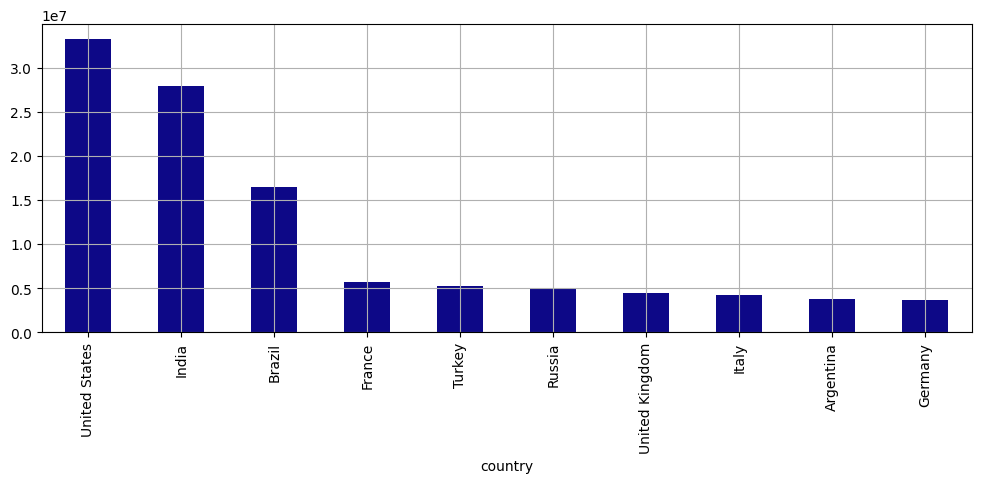

In [93]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

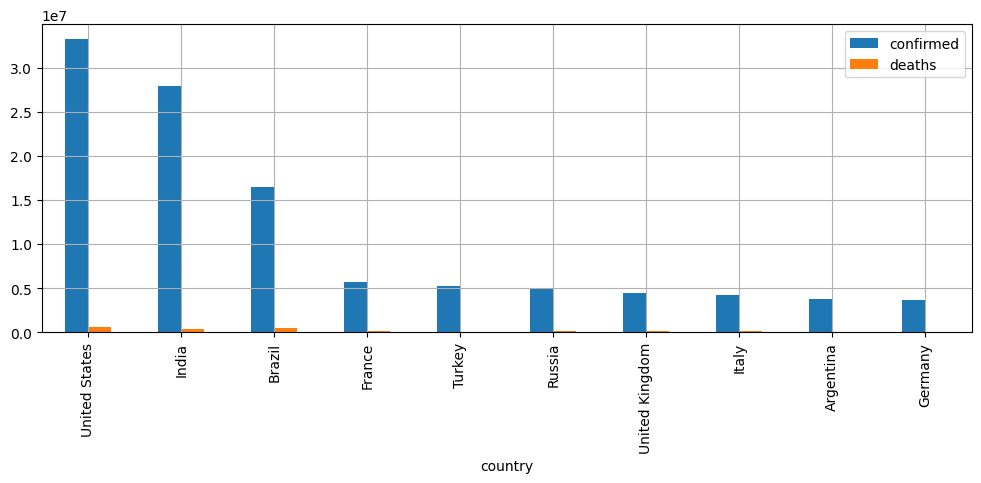

In [94]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

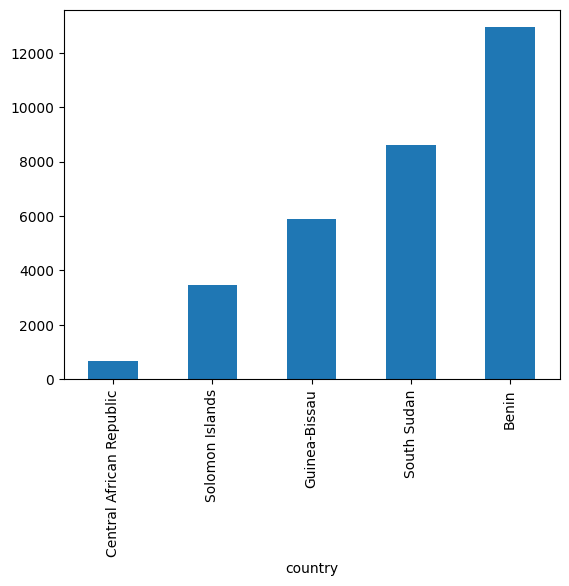

In [95]:

covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

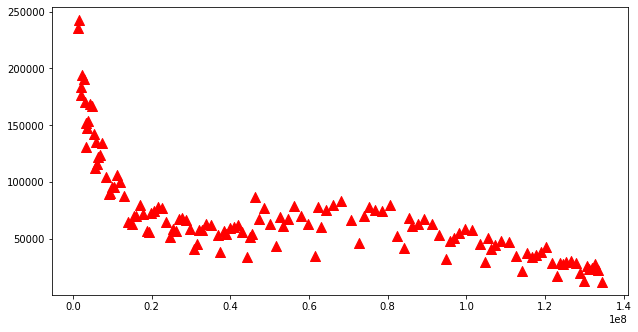

In [97]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='^',
    c = 'red'
);

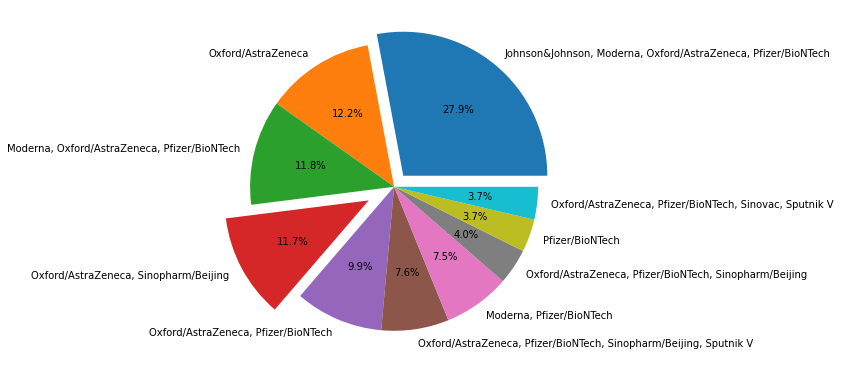

In [103]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0.2, 0, 0, 0, 0, 0, 0]
);

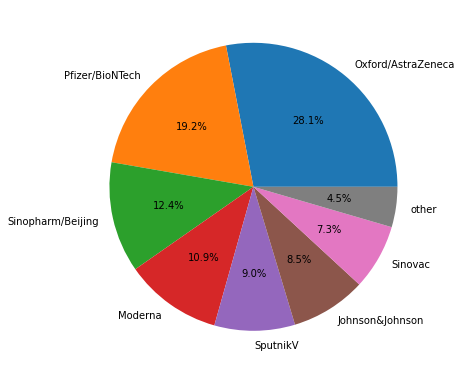

In [105]:
# Обратите внимание, что диаграмма показывает соотношение только для десяти популярных комбинаций вакцин, а не для всех вакцин в совокупности,
# что является не совсем корректным для круговой диаграммы, так как она должна отображать единое целое.

# К тому же наша круговая диаграмма считает количество использований каждой комбинации в таблице, а не количество стран,
# в которых используется эта комбинация, что также является некорректным.

#  Более правильным вариантом в данном случае было бы выделить каждую вакцину в отдельности и посчитать, в скольких странах она используется.
# Однако для этого нам необходимо будет совершить несколько довольно сложных преобразований:
# Для начала нам необходимо избавиться от пропусков в столбце с вакцинами. Сделаем это с помощью метода dropna(), 
# который удаляет строки, содержащие пропуски в столбце, указанном в параметре subset(). Данный метод мы будем изучать в следующем модуле, 
# посвящённом очистке данных — пока что не вам не стоит заострять на нём внимание:
combination_not_nan = covid_df.dropna(subset=['vaccines'])

# Полученные данные необходимо сгруппировать по странам (country) и определить последнюю зафиксированную комбинации вакцин в столбце vaccines:

combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()

# Преобразуем данные с помощью метода apply(): применим к столбцу lambda-функцию, в которой будем удалять из строки с комбинациями вакцин пробелы
# и разделять комбинацию на отдельные составляющие по запятым.

combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(','))

# # В результате в каждой строке столбца получим список с отдельными вакцинами, которые используются в стране:
# Создадим словарь vaccines_dict={}, ключами которого будут являться уникальные вакцины, а значениями — количество стран,
# в которых они используются. Изначально словарь пустой.
# Заполнение словаря реализуем «в лоб» — используя циклы. Во внешнем цикле будем проходиться по всем элементам Series combination_last.
# На каждой итерации цикла в переменной цикла vaccines_list будет находиться список вакцин, которые используются в стране.
# Во внутреннем цикле будем проходиться по элементам этого списка, вакцинам. Переменную внутреннего цикла назовём vaccine.
# В теле внутреннего цикла проверяем условие, что текущей вакцины ещё нет среди ключей словаря vaccones_dict. 
# Если это условие выполняется, добавляем вакцину в словарь со значением 1. В противном случае увеличиваем текущее количество стран, в которых используется данная вакцина:

vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
            
# В результате работы получаем словарь, который преобразуем в объект Series. Далее выделим семь наиболее популярных вакцин,
# а остальные обозначим как 'other'. Для этого сортируем Series по убыванию. Вычислим суммарное количество стран,
# в которых используются вакцины, не попавшие в наш ТОП-7, результат запишем в Series по индексу 'other'.
# Далее выделим восемь наибольших значений в полученной Series — для них и будем строить круговую диаграмму.

vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]         

# Строим круговую диаграмму:

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

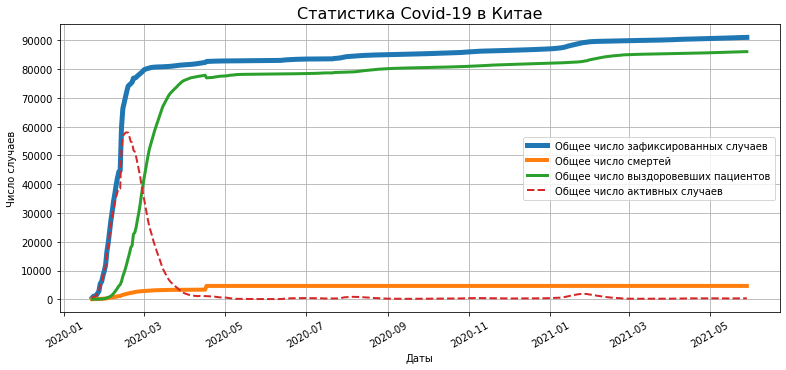

In [99]:
china_data = covid_df[covid_df['country'] == 'China'].sort_values(by='date')
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=5)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=4)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=2, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

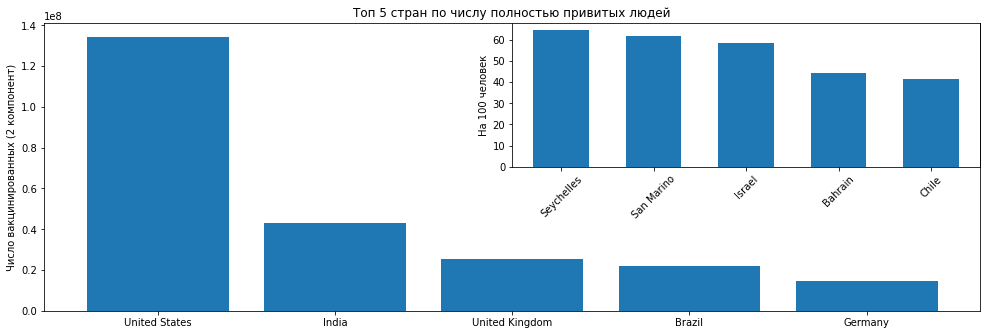

In [100]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(
    x = vacc_country.index,
    height = vacc_country,
    );
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.5, 0.5, 0.5, 0.5])
insert_axes.bar(
    x = vacc_country_per_hundred.index,
    height = vacc_country_per_hundred,
    width=0.6
    );
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

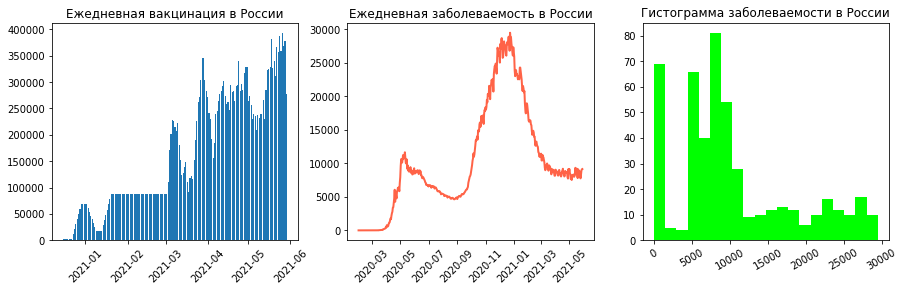

In [102]:
russia_data = covid_df[covid_df['country'] == 'Russia']

#визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
#столбчатая диаграмма
axes[0].bar(x=russia_data['date'], 
            height=russia_data['daily_vaccinations'],
            label='Число вакцинированных')
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

#линейный график
axes[1].plot(russia_data['date'],
             russia_data['daily_confirmed'],
             label='Число заболевших',
             color='tomato', lw=2)
axes[1].set_title('Ежедневная заболеваемость в России')
axes[1].xaxis.set_tick_params(rotation=45)

#гистограмма
axes[2].hist(x=russia_data['daily_confirmed'],
             label=['Число заболевших'], 
             color='lime', bins = 20)
axes[2].set_title('Гистограмма заболеваемости в России');
axes[2].xaxis.set_tick_params(rotation=30)

In [108]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4,0,0,4,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4,0,0,4,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5,0,0,5,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5,0,0,5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


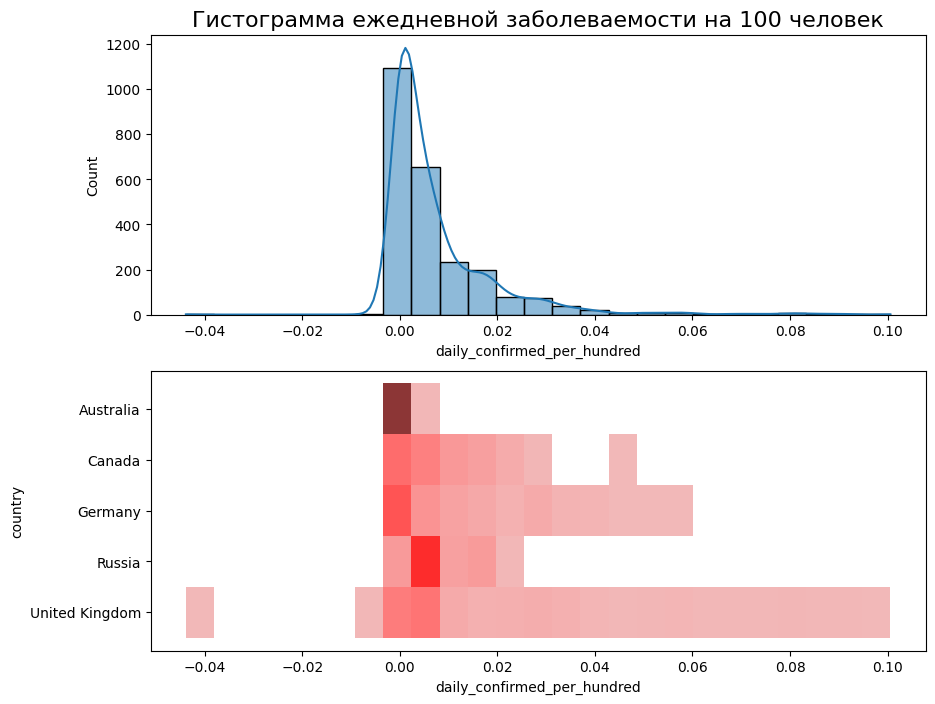

In [109]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

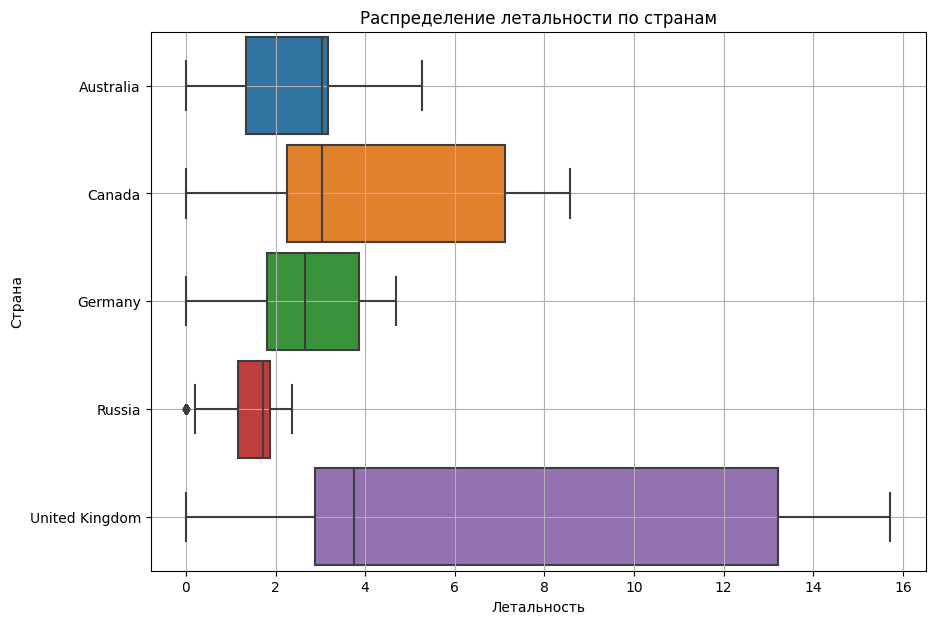

In [111]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

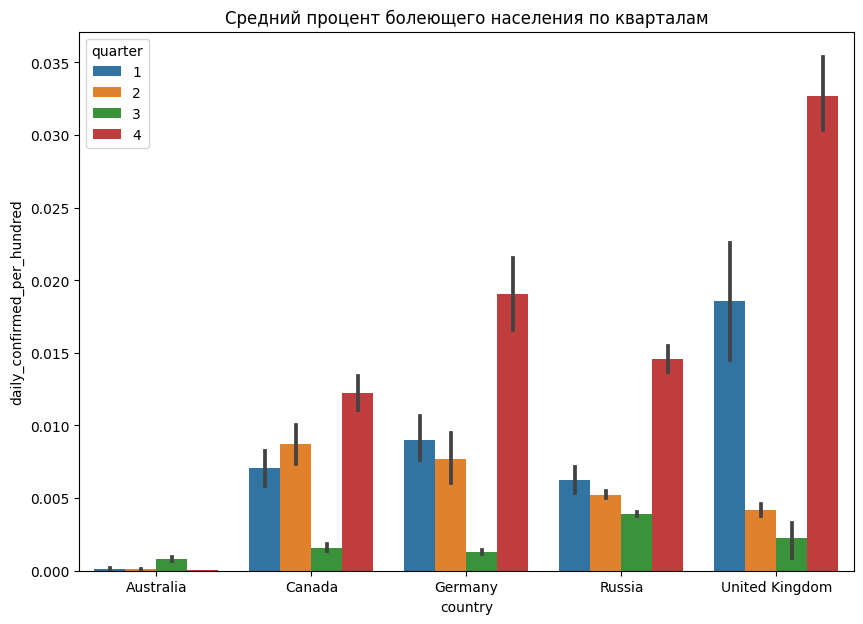

In [112]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

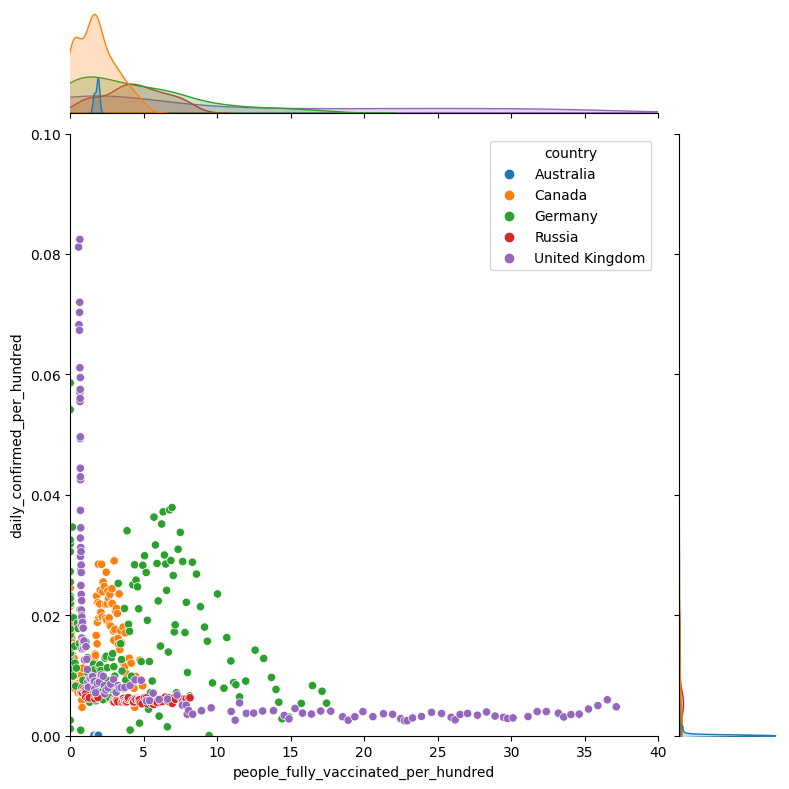

In [113]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

In [114]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,...,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,0.09,0.12,0.12,0.13,0.14,0.16,0.19,0.22,0.26,0.27,...,39.38,40.12,40.97,41.93,42.99,43.88,44.67,45.66,46.33,47.18,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.05,0.11,0.18,0.24,0.27,...,33.22,34.18,35.44,35.76,36.40,36.68,36.88,37.31,37.93,38.62,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.02,9.05,9.30,9.36,9.50,9.78,9.81,9.84,10.00,10.09,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,1.47,NaN,NaN,NaN,NaN,NaN,...,52.18,52.37,52.64,52.95,53.27,53.62,53.81,53.97,54.23,54.61,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


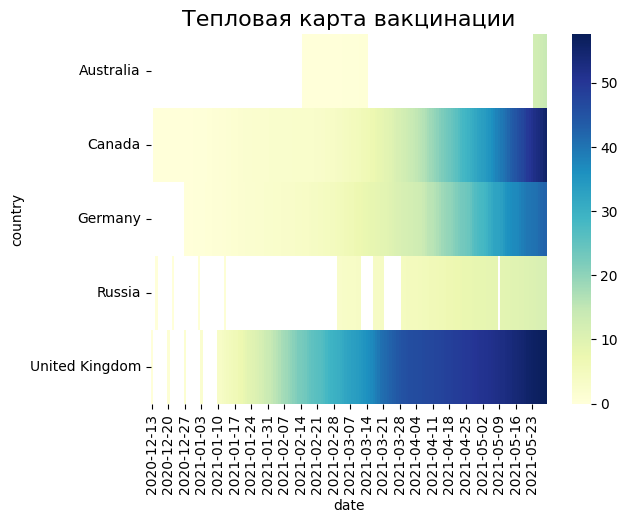

In [117]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

In [119]:
# Задание 6.4
# Создайте новый признак confirmed_per_hundred, который покажет процентное отношение заболевших вирусом к общему числу населения в странах ().
# Постройте тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (confirmed_per_hundred) 
# в странах из таблицы croped_covid_df.
# Выберите верные выводы по построенному графику:

croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100
pivot2 = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
pivot2.columns = pivot2.columns.astype('string')
display(pivot2)


date,2020-01-23,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,...,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.000016,0.000016,0.000019,0.000019,0.000019,0.000035,0.000035,0.000047,0.000047,0.000047,0.000051,0.000051,0.000054,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,...,0.116368,0.116400,0.116435,0.116442,0.116470,0.116512,0.116524,0.116543,0.116578,0.116590,0.116606,0.116621,0.116637,0.116683,0.116722,0.116788,0.116854,0.116897,0.116932,0.116983
Canada,NaN,NaN,0.000003,0.000003,0.000005,0.000005,0.000008,0.000008,0.000011,0.000011,0.000011,0.000011,0.000013,0.000013,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019,...,3.458133,3.472401,3.489810,3.505172,3.523181,3.535104,3.546526,3.563582,3.573876,3.586657,3.599497,3.611526,3.620169,3.628017,3.632706,3.642529,3.648718,3.661252,3.669520,3.675536
Germany,NaN,NaN,NaN,NaN,0.000005,0.000005,0.000005,0.000006,0.000010,0.000012,0.000014,0.000014,0.000014,0.000014,0.000016,0.000016,0.000017,0.000017,0.000019,0.000019,...,4.226164,4.249690,4.257561,4.273843,4.286237,4.295040,4.303481,4.309909,4.318958,4.333149,4.345962,4.355632,4.363299,4.368845,4.371625,4.374704,4.380047,4.388347,4.395716,4.401106
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,3.310806,3.316279,3.321825,3.327483,3.333880,3.339817,3.345589,3.351894,3.357414,3.362757,3.368999,3.375035,3.380916,3.386963,3.392637,3.397954,3.403604,3.409708,3.415960,3.422232
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000004,0.000004,0.000004,0.000012,0.000012,0.000013,...,6.567521,6.571194,6.574580,6.578507,6.581749,6.584787,6.587628,6.590567,6.587084,6.590249,6.594230,6.598223,6.601946,6.605033,6.608528,6.612093,6.616504,6.621495,6.627439,6.632219


In [ ]:
heatmap = sns.heatmap(data=pivot2, cmap='YlGnBu')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16);